<a href="https://colab.research.google.com/github/DharaniRajDS/Data-Analysis/blob/main/EDA_Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [ ]:
df = pd.read_csv("supermarket_sales.csv")

In [ ]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-73-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head(2)

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-01-05  13:08  Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29     Cash   76.40                 4.761905        3.8200   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6

In [ ]:
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.131488e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

<ipython-input-77-c9705bd8f91a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


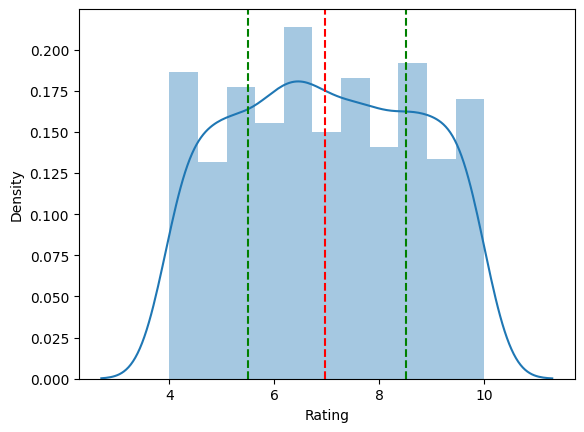

In [ ]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red', ls='--')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--')
plt.axvline(x=np.percentile(df['Rating'],75),c='green', ls='--')

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

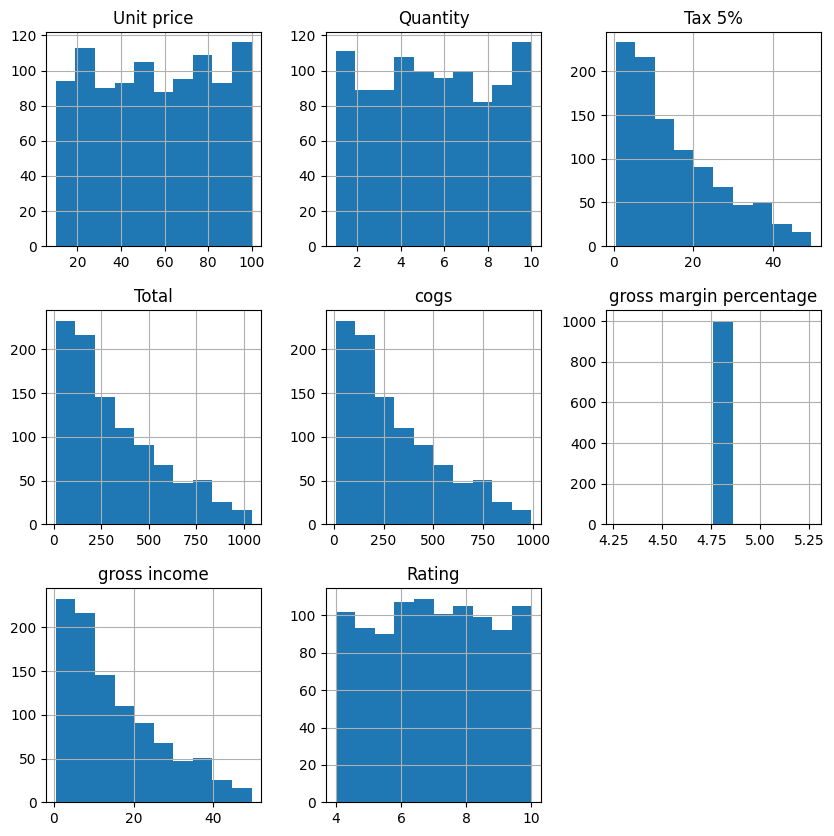

In [ ]:
df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

<ipython-input-79-8c16e7f17345>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Branch', data=df, palette='Set1')


<Axes: xlabel='Branch', ylabel='count'>

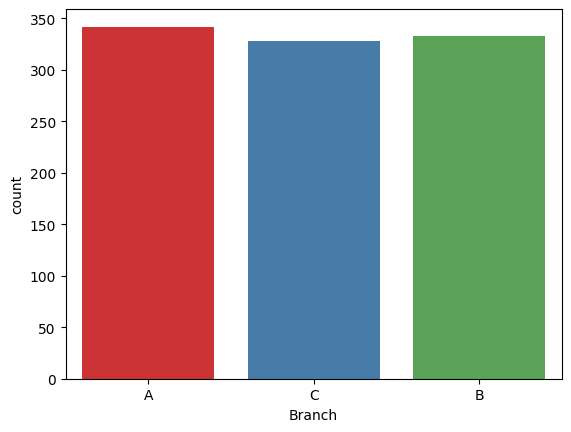

In [ ]:
sns.countplot(x='Branch', data=df, palette='Set1')

In [ ]:
df['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

<ipython-input-81-13edf513e2ce>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment', data=df, palette='Set1')


<Axes: xlabel='Payment', ylabel='count'>

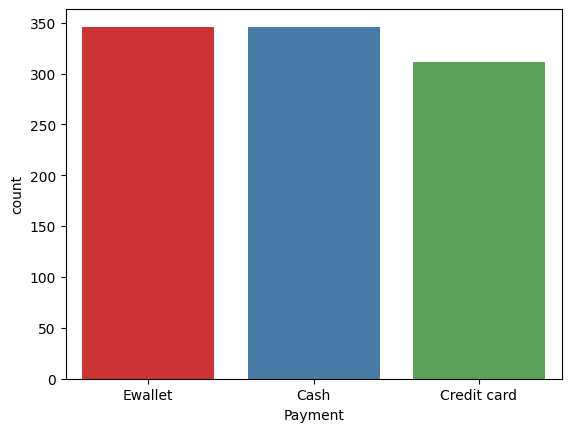

In [ ]:
sns.countplot(x='Payment', data=df, palette='Set1')

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

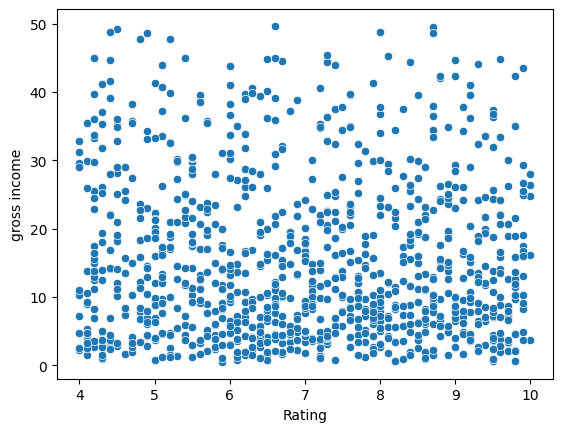

In [ ]:
sns.scatterplot(x=df['Rating'], y=df['gross income'])

<Axes: xlabel='Rating', ylabel='gross income'>

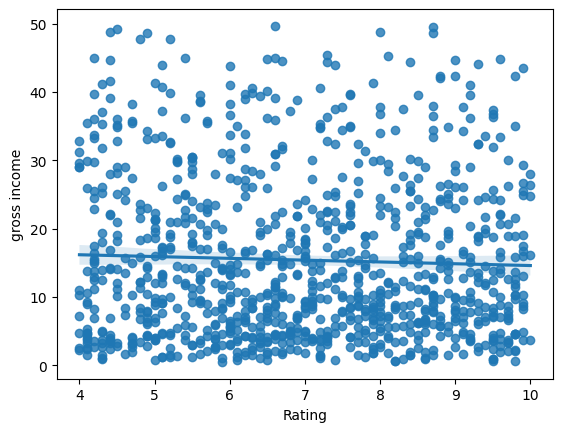

In [ ]:
sns.regplot(x=df['Rating'], y=df['gross income'])

<ipython-input-59-8e50d79b99d1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Branch'], y=df['gross income'], palette='Set1')


<Axes: xlabel='Branch', ylabel='gross income'>

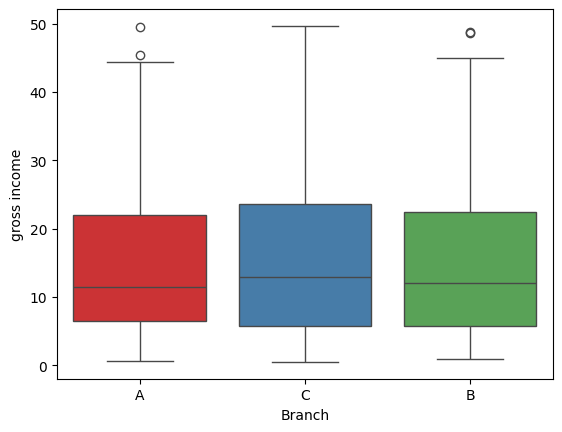

In [ ]:
sns.boxplot(x=df['Branch'], y=df['gross income'], palette='Set1')

**Question 4:** Is there a noticeable time trend in gross income?

<ipython-input-60-5767ec6b3d30>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['gross income'], palette='Set1')


<Axes: xlabel='Gender', ylabel='gross income'>

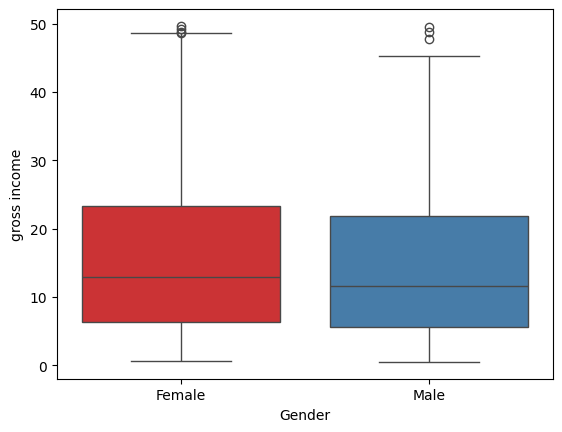

In [ ]:
sns.boxplot(x=df['Gender'], y=df['gross income'], palette='Set1')

In [ ]:
df.head(2)

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-01-05  13:08  Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29     Cash   76.40                 4.761905        3.8200   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6

In [ ]:
df.groupby(df.index).mean(numeric_only=True)

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

In [ ]:
df.groupby(df.index).mean(numeric_only=True).index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<Axes: xlabel='Date', ylabel='gross income'>

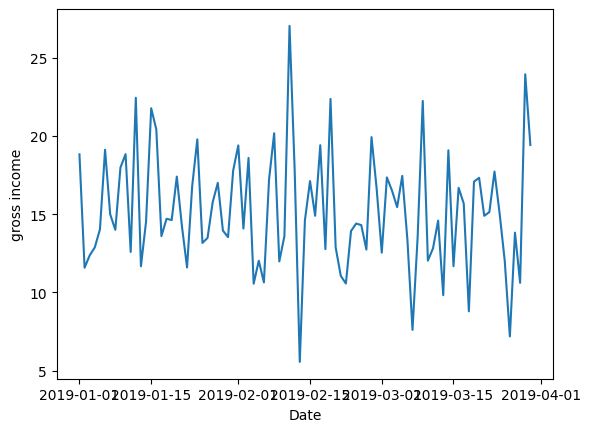

In [ ]:
sns.lineplot(x=df.groupby(df.index).mean(numeric_only=True).index,
             y=df.groupby(df.index).mean(numeric_only=True)['gross income'])

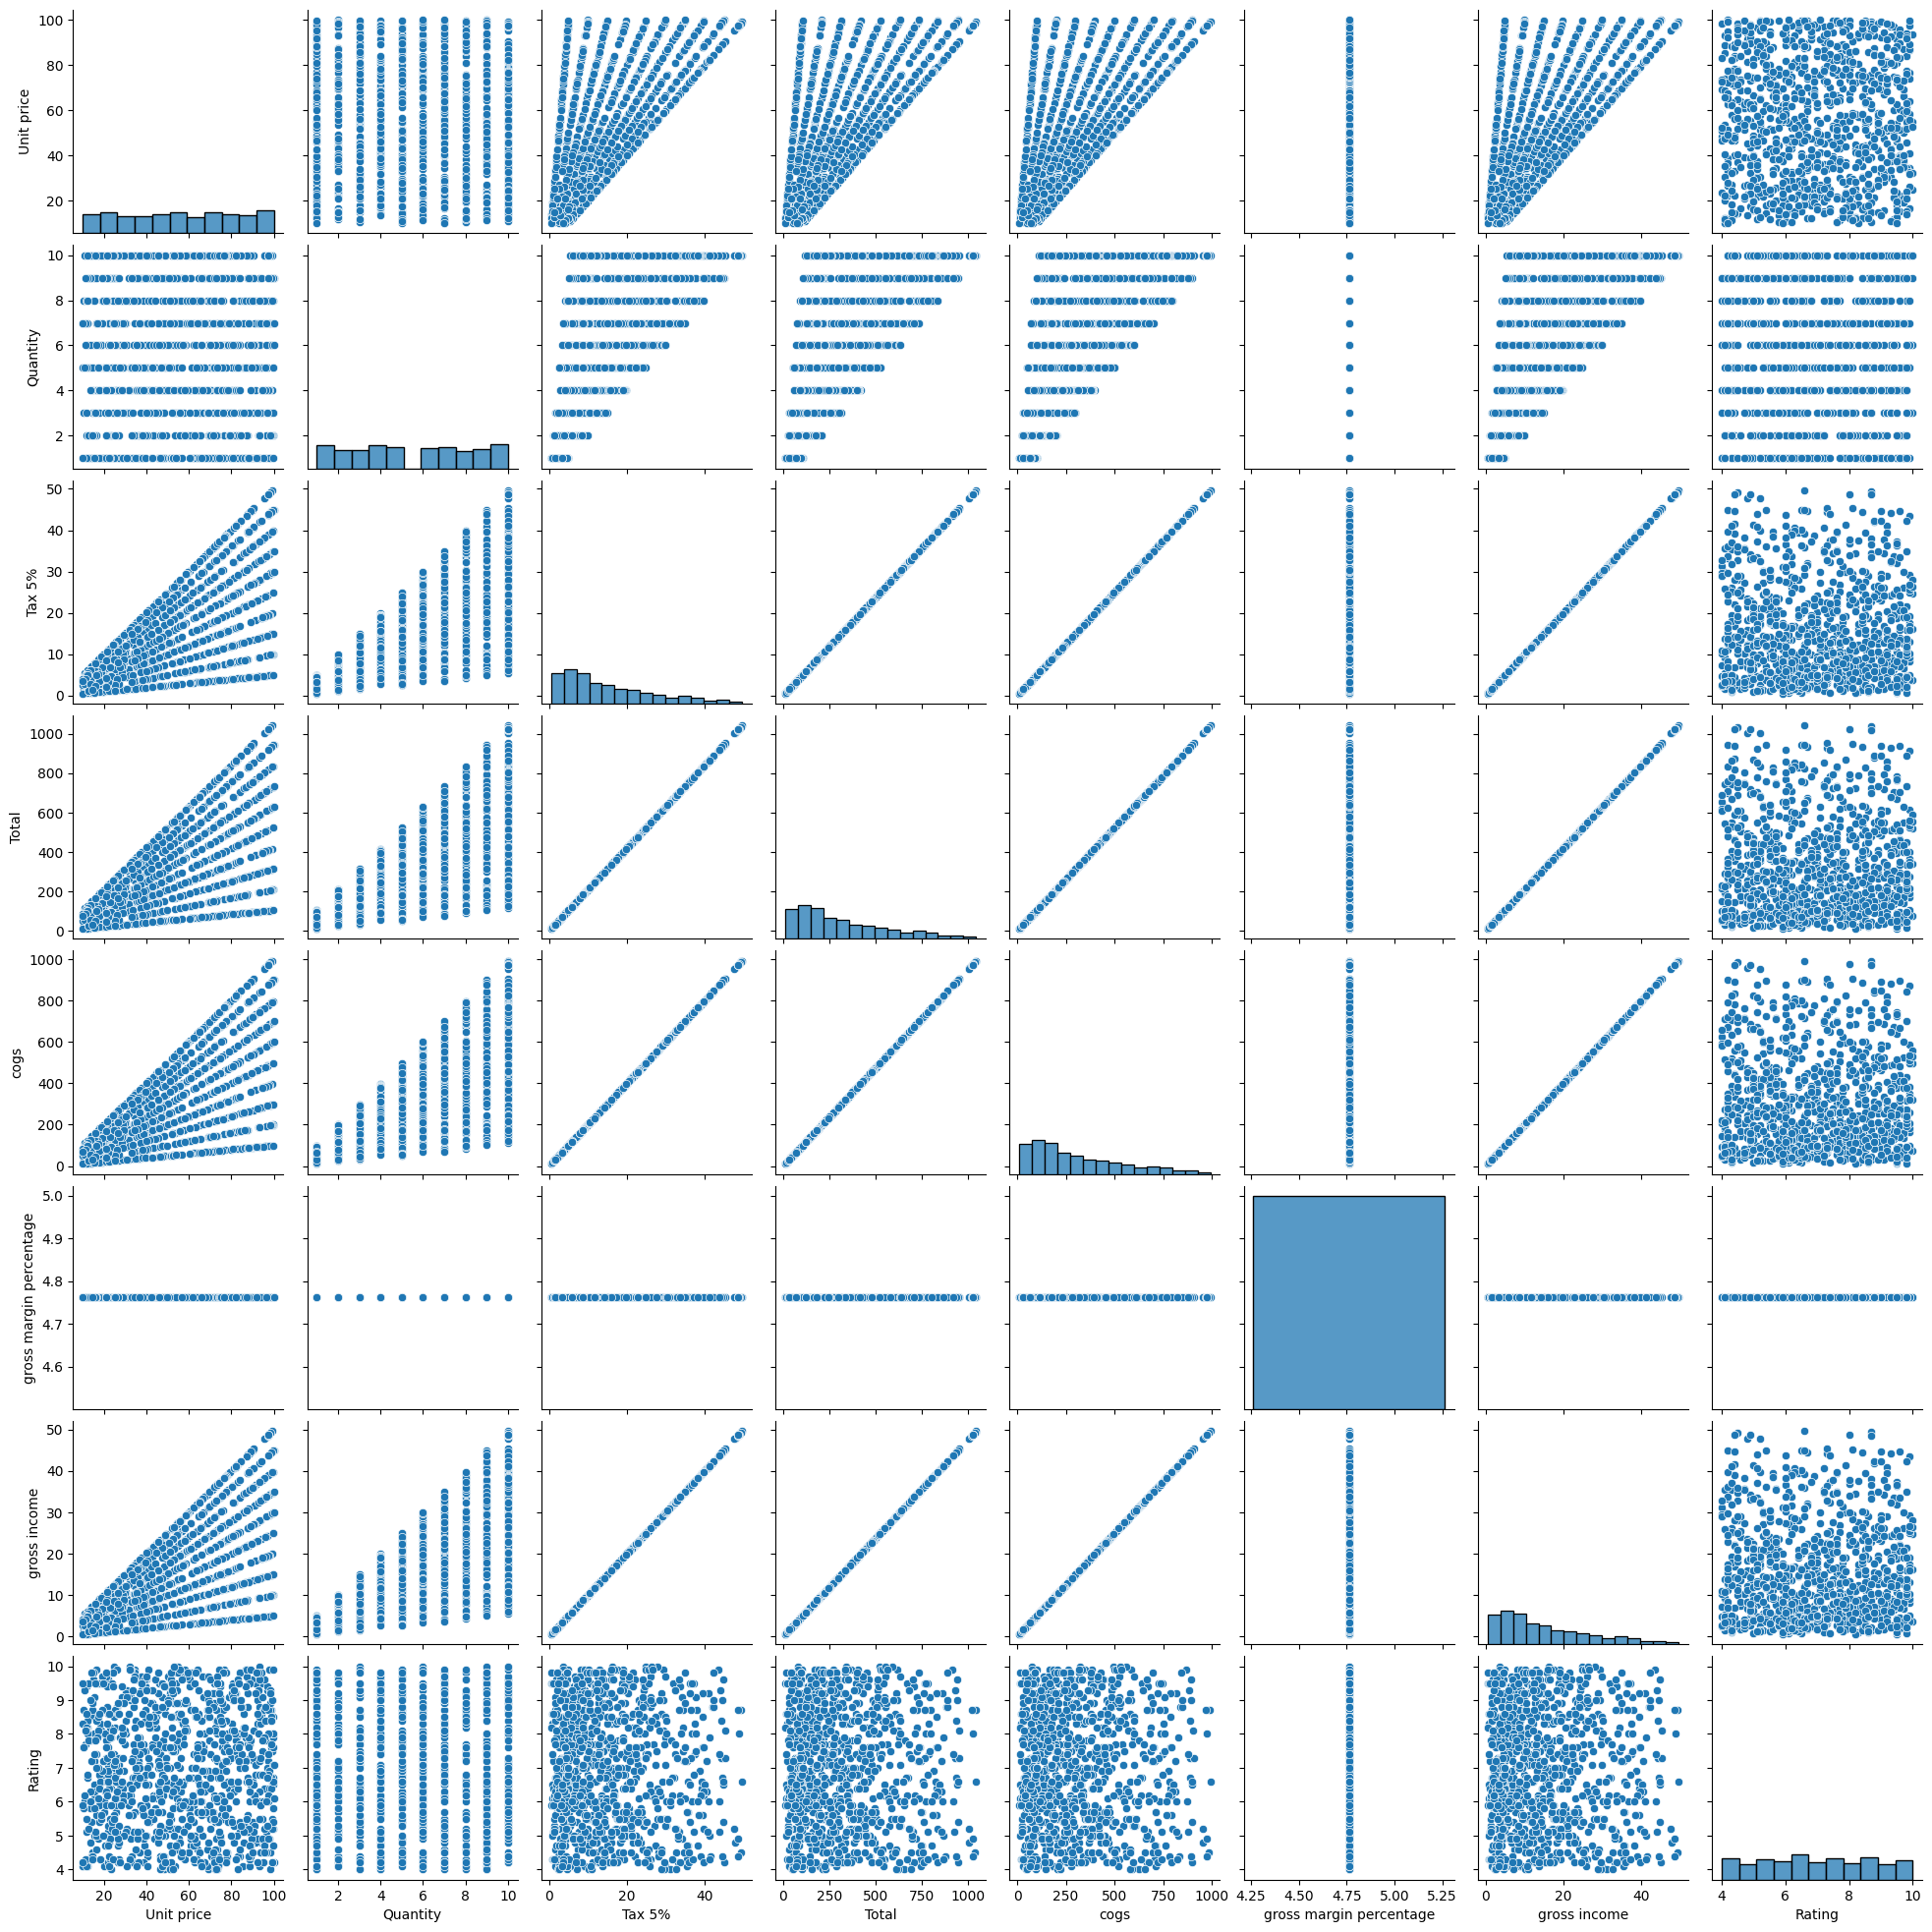

In [ ]:
sns.pairplot(df)

### Task 4: Dealing With Duplicate Rows and Missing Values

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000     True
1001     True
1002     True
Length: 1003, dtype: bool

In [ ]:
df.duplicated().sum()

np.int64(3)

In [ ]:
df[df.duplicated()==True]

Date   Invoice ID Branch      City Customer type  Gender  \
1000 2019-02-18  849-09-3807      A    Yangon        Member  Female   
1001 2019-03-10  745-74-0715      A    Yangon        Normal    Male   
1002 2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total   Time  \
1000     Fashion accessories       88.34       7.0  30.919  649.299  13:28   
1001  Electronic accessories         NaN       2.0   5.803  121.863  20:46   
1002  Electronic accessories       87.08       NaN  30.478  640.038  15:17   

      Payment    cogs  gross margin percentage  gross income  Rating  
1000     Cash  618.38                 4.761905        30.919     6.6  
1001  Ewallet  116.06                 4.761905         5.803     8.8  
1002     Cash  609.56                 4.761905        30.478     5.5

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

Date                        0
Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [ ]:
df.isna().sum()/len(df)

Date                       0.000
Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<Axes: >

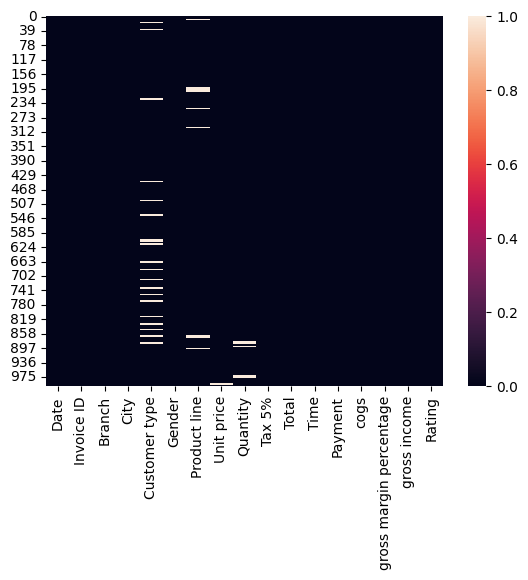

In [ ]:
sns.heatmap(df.isna())

<Axes: >

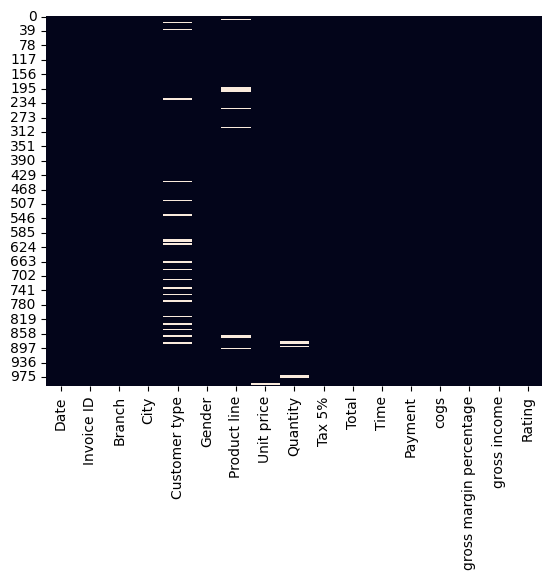

In [ ]:
sns.heatmap(df.isna(),cbar=False)

In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

<Axes: >

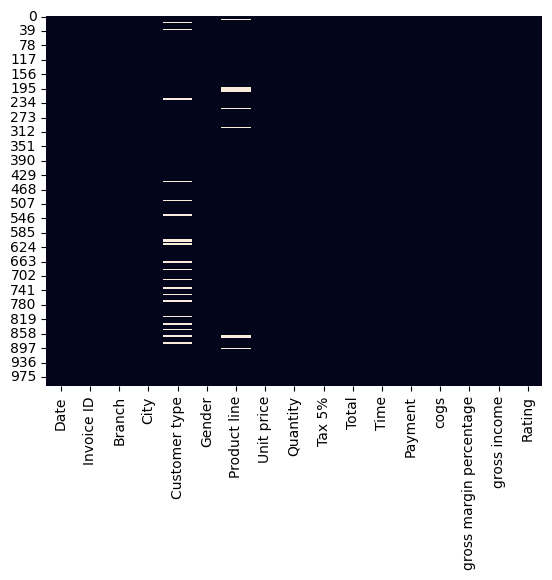

In [ ]:
sns.heatmap(df.isna(),cbar=False)

In [ ]:
df.mode()

Date   Invoice ID Branch    City Customer type  Gender  \
0   2019-02-07  101-17-6199      A  Yangon        Normal  Female   
1          NaT  101-81-4070    NaN     NaN           NaN     NaN   
2          NaT  102-06-2002    NaN     NaN           NaN     NaN   
3          NaT  102-77-2261    NaN     NaN           NaN     NaN   
4          NaT  105-10-6182    NaN     NaN           NaN     NaN   
..         ...          ...    ...     ...           ...     ...   
995        NaT  894-41-5205    NaN     NaN           NaN     NaN   
996        NaT  895-03-6665    NaN     NaN           NaN     NaN   
997        NaT  895-66-0685    NaN     NaN           NaN     NaN   
998        NaT  896-34-0956    NaN     NaN           NaN     NaN   
999        NaT  898-04-2717    NaN     NaN           NaN     NaN   

            Product line  Unit price  Quantity   Tax 5%     Total   Time  \
0    Fashion accessories   55.700292      10.0   4.1540   87.2340  14:42   
1                    NaN         NaN       NaN   4.4640   93.7440  19:48   
2                    NaN         NaN       NaN   8.3770  175.9170    NaN   
3                    NaN         NaN       NaN   9.0045  189.0945    NaN   
4                    NaN         NaN       NaN  10.3260  216.8460    NaN   
..                   ...         ...       ...      ...       ...    ...   
995                  NaN         NaN       NaN      NaN       NaN    NaN   
996                  NaN         NaN       NaN      NaN       NaN    NaN   
997                  NaN         NaN       NaN      NaN       NaN    NaN   
998                  NaN         NaN       NaN      NaN       NaN    NaN   
999                  NaN         NaN       NaN      NaN       NaN    NaN   

     Payment    cogs  gross margin percentage  gross income  Rating  
0    Ewallet   83.08                 4.761905        4.1540     6.0  
1        NaN   89.28                      NaN        4.4640     NaN  
2        NaN  167.54                      NaN        8.3770     NaN  
3        NaN  180.09                      NaN        9.0045     NaN  
4        NaN  206.52                      NaN       10.3260     NaN  
..       ...     ...                      ...           ...     ...  
995      NaN     NaN                      NaN           NaN     NaN  
996      NaN     NaN                      NaN           NaN     NaN  
997      NaN     NaN                      NaN           NaN     NaN  
998      NaN     NaN                      NaN           NaN     NaN  
999      NaN     NaN                      NaN           NaN     NaN  

[1000 rows x 17 columns]

In [ ]:
df.mode().iloc[0]

Date                       2019-02-07 00:00:00
Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.700292
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

<Axes: >

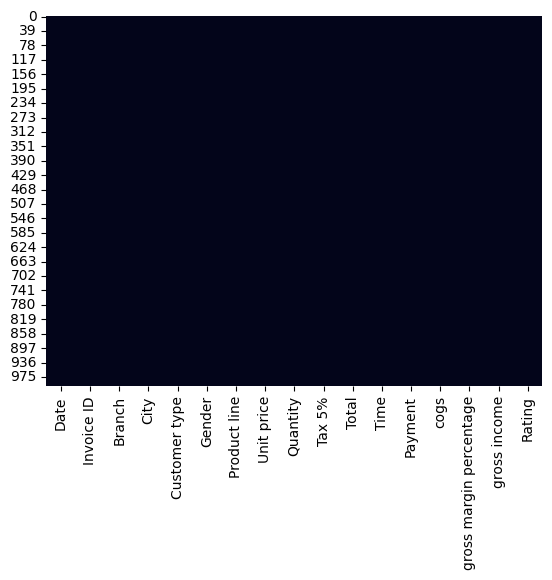

In [ ]:
sns.heatmap(df.isna(),cbar=False)

In [ ]:
dataset = pd.read_csv('/content/supermarket_sales.csv')
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:00<00:00, 40.07it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In [ ]:
np.corrcoef(df['gross income'], df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [ ]:
np.corrcoef(df['gross income'], df['Rating'])[1][0]

np.float64(-0.03644170499701839)

In [ ]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

np.float64(-0.04)

In [ ]:
df.corr(numeric_only=True)

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.014786  0.629034  0.629034  0.629034   
Quantity                   0.014786  1.000000  0.704067  0.704067  0.704067   
Tax 5%                     0.629034  0.704067  1.000000  1.000000  1.000000   
Total                      0.629034  0.704067  1.000000  1.000000  1.000000   
cogs                       0.629034  0.704067  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.629034  0.704067  1.000000  1.000000  1.000000   
Rating                    -0.006601 -0.021225 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.629034 -0.006601  
Quantity                                     NaN      0.704067 -0.021225  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

In [ ]:
np.round(df.corr(numeric_only=True),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<Axes: >

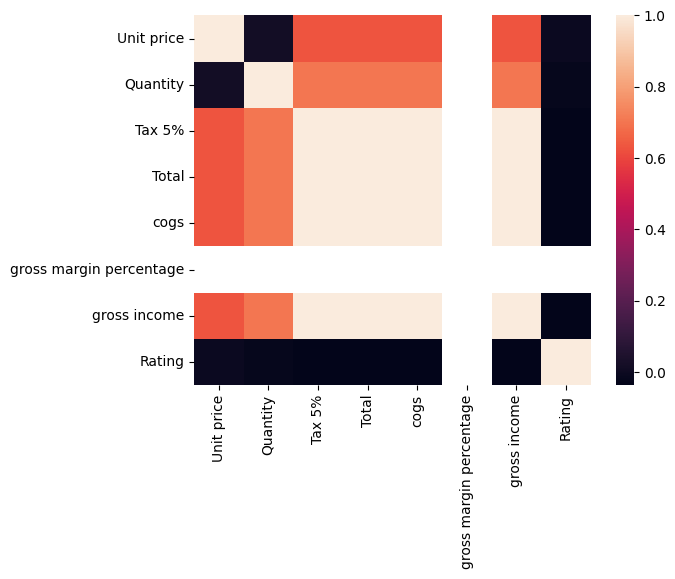

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: >

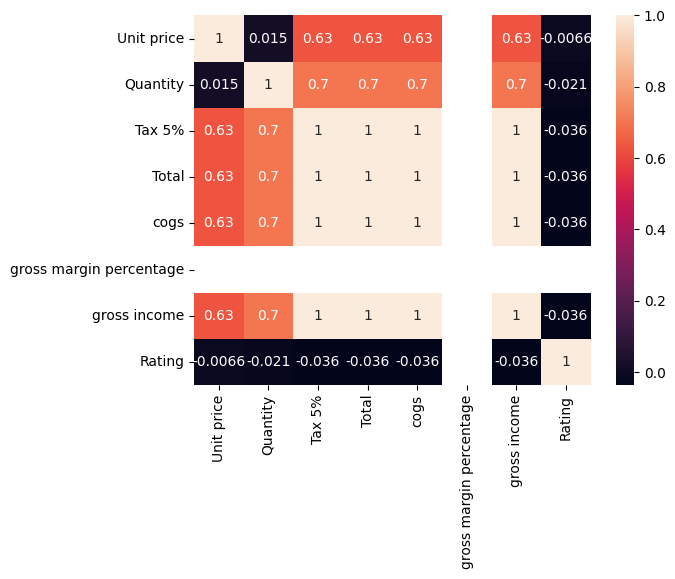

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/